# Data Science Job Salaries

Goal of the notebook is :
1- Explore every feature in the dataset
2 - Work Year Analysis(with Salary, Remote Ratio)
3 - Experience Level Analysis (with Employment Type, Top 3 Job Title, Company Size)
4- Company Location Analysis (with Experience Level)
5- Salary Analysis (with Work Year, Experience Level, Company Size, Job Title, Remote Ratio)

In [5]:
#install 
!pip install country_converter

# data
import pandas as pd
import numpy as np
import country_converter as coco

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud

# nltk
import nltk

# styling
%matplotlib inline
sns.set_theme(style="dark")
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

# read dataframe (drop 3 columns)
df = pd.read_csv('ds_salaries.csv')
df.drop(df[['salary','salary_currency','Unnamed: 0']],axis=1, inplace=True)

In [6]:
print(df.shape)
df.tail(3)

(607, 9)


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,IN,100,US,L


Text(0.5, 1.0, 'Distribution of Missing Values')

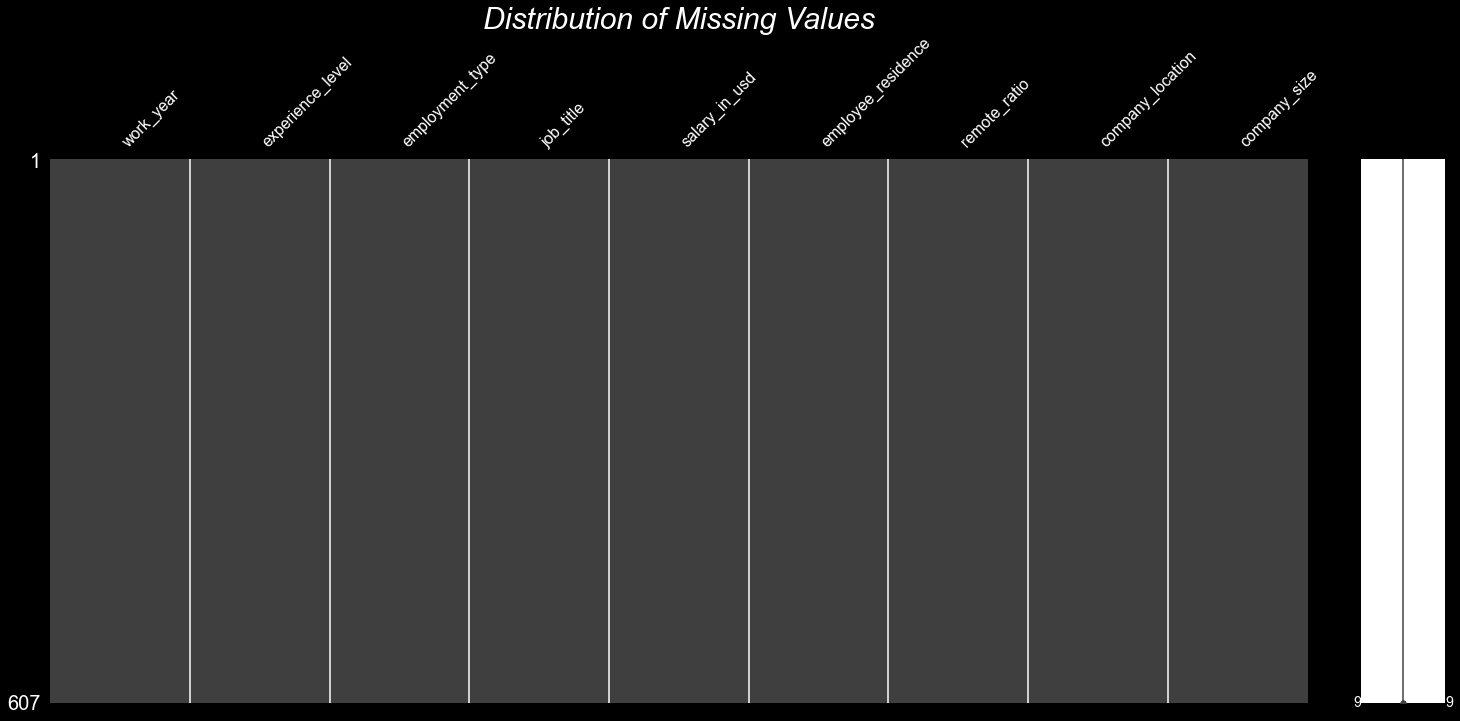

In [7]:
msno.matrix(df)
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique')

# Unvariate Analysis

In this section, we'll explore each columns in the dataset to see the distributions of features, and to get some useful informations.

Mainly two parts in the section: Analysis on categorical columns; Analysis on numeric columns.

## Categorical Columns

# 2.1.1 Experience Level

## EN, which refers to Entry-level / Junior
## MI, which refers to Mid-level / Intermediate
## SE, which refers to Senior-level / Expert
## EX, which refers to Executive-level / Director

In [11]:
df['experience_level'] = df['experience_level'].replace('EN','Entry-level/Junior')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level/Intermediate')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level/Expert')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level/Director')

ex_level = df['experience_level'].value_counts()
fig = px.treemap(ex_level, 
                 path=[ex_level.index],
                 values=ex_level.values, 
                 title = 'Experience Level',
                 color=ex_level.index,
                 color_discrete_sequence=px.colors.sequential.PuBuGn,
                 template='plotly_dark',
#                  textinfo = "label+value+percent parent+percent entry+percent root",
                 width=1000, height=500)

percents = np.round((100*ex_level.values / sum(ex_level.values)).tolist(),2)
fig.data[0].customdata = [35.09, 46.13, 4.28 , 14.5]
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'

fig.update_layout(
    font=dict(size=17,family="Franklin Gothic"))

fig.show()

From treemap above, we can notice that Senior-level/Expert accounts for 46%, and Mid-level/Intermediate ranked the next.
There's only 4.28% of Executive-level/Directior.

# 2.1.2 Job Titles

## In this section, We'll answer two questions below:
## (1)How many job titles in the dataset?

## (2)Which are top 10 frequent job titles?

In [12]:
print('how many job titles in the dataset: ',df['job_title'].value_counts().size)

how many job titles in the dataset:  50


In [13]:
top10_job_title = df['job_title'].value_counts()[:10]
fig = px.bar(y=top10_job_title.values, 
             x=top10_job_title.index, 
             color = top10_job_title.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=top10_job_title.values,
             title= 'Top 10 Job Titles',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Job Titles",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

Data scientist, data engineer and data analyst ranked top 3 frequent job titles, but it can be easily seen that others are also related to those top 3 job titles.

and WordCloud of job title shown as below:

In [14]:
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=1200, 
               height=600, 
               max_words=50,
               colormap= colormap,
               max_font_size = 150,
               random_state=88, 
               background_color=color_background).generate_from_frequencies(data)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

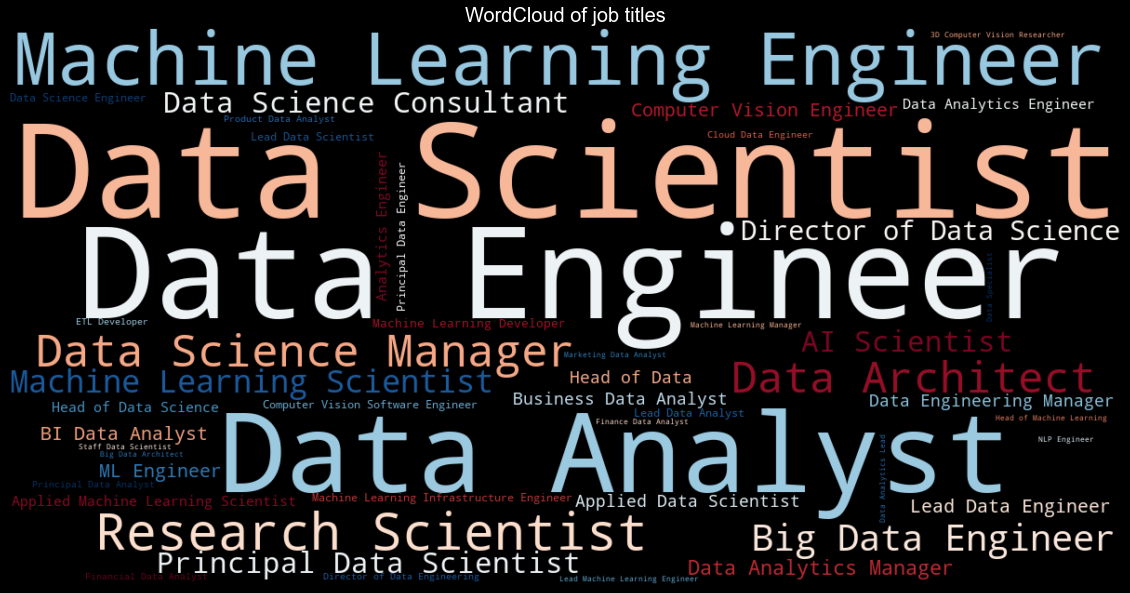

In [15]:
freq_df = Freq_df(df['job_title'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data ,'black','RdBu', 'WordCloud of job titles')

# 2.1.3 Employment Type

## 4 employment type here, each are:

## (1) PT: Part-time
## (2) FT: Full-time
## (3) CT: Contract
## (4) FL: Freelance

In [16]:
type_grouped = df['employment_type'].value_counts()
fig = px.bar(x = type_grouped.index, y = type_grouped.values, 
       color = type_grouped.index, 
       color_discrete_sequence=px.colors.sequential.BuPu,
       template = 'plotly_dark',
       text = type_grouped.values, title = 'Employment Type Distribution')
fig.update_layout(
    xaxis_title="Employment Type",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.update_traces(width=0.5)
fig.show()

Easily seen that Most of employee types are full-time.

# 2.1.4 Employee Residence & Company Location

We'll explore employee's residence and company location by plotting map & bar charts in this section.

In [17]:
converted_country = coco.convert(names=df['employee_residence'], to="ISO3")
df['employee_residence'] = converted_country

In [18]:
residence = df['employee_residence'].value_counts()
fig = px.choropleth(locations=residence.index,
                    color=residence.values,
                    color_continuous_scale=px.colors.sequential.YlGn,
                    template='plotly_dark',
                    title = 'Employee Loaction Distribution Map')

fig.update_layout(font = dict(size= 17, family="Franklin Gothic"))
fig.show()

From above, it is obvious that most of the employees are from USA, and bar plot below:

In [19]:
top10_employee_location = residence[:10]
fig = px.bar(y=top10_employee_location.values, 
             x=top10_employee_location.index, 
             color = top10_employee_location.index,
             color_discrete_sequence=px.colors.sequential.deep,
             text=top10_employee_location.values,
             title= 'Top 10 Location of Employee',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Location of Employee",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

Now we found that the USA contains about 332 accounts, and GBR, IND ranked the next.

Let's compare employee residence and company location below:

In [20]:
converted_country = coco.convert(names=df['company_location'], to="ISO3")
df['company_location'] = converted_country
c_location = df['company_location'].value_counts()
top_10_company_location = c_location[:10]
fig = go.Figure(data=[
    go.Bar(name='Employee Loaction', 
           x=top10_employee_location.index, y=top10_employee_location.values,
           text=top10_employee_location.values,marker_color='crimson'),
    go.Bar(name='Company Location', x=top_10_company_location.index, 
           y=top_10_company_location.values,text=top_10_company_location.values,marker_color='white')
])
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Comparison of Employee Location and Company Location',template='plotly_dark',
                  font = dict(size=17,family="Franklin Gothic"))

fig.show()

We can notice that USA, GBR, CAN and DEU have higher count of company location then employee location as shown above.

# 2.1.5 Company Size

In [21]:
grouped_size = df['company_size'].value_counts()

fig = px.bar(y=grouped_size.values, 
             x=grouped_size.index, 
             color = grouped_size.index,
             color_discrete_sequence=px.colors.sequential.dense,
             text=grouped_size.values,
             title= 'Distribution of Company Size',
             template= 'plotly_dark')

fig.update_traces(width=0.4)
fig.update_layout(
    xaxis_title="Company Size",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

It can be easily seen that company size mostly consists of medium size, and the large size ranked the next.

# 2.2 Explore Numeric Columns

## We'll explore 3 numeric columns in this section, each are:
## (1) work_year: The year the salary was paid
## (2) salary_in_usd: The salary in USD
## (3) remote_ratio: The overall amount of work done remotely,

## 2.2.1 Work Year

In [22]:
wkyear = df['work_year'].value_counts()
fig = px.pie(values=wkyear.values, 
             names=wkyear.index, 
             color_discrete_sequence=px.colors.sequential.PuBu,
             title= 'work year distribution',template='plotly_dark')
fig.update_traces(textinfo='label+percent+value', textfont_size=18,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.update_layout(
    font=dict(size=20,family="Franklin Gothic"))
fig.show()

2022 year data accounts for 52.4% in the dataset, the next is 2021, which accounts for 35.7%.

## 2.2.2 Salary in USD

In [23]:
# Used box plot & distplot to see the distribution of Salary in USD
hist_data = [df['salary_in_usd']]
group_labels = ['salary_in_usd']
fig1 = px.box(y=df['salary_in_usd'],template= 'plotly_dark', title = 'Salary in USD (BoxPlot)')
fig2 = ff.create_distplot(hist_data, group_labels, show_hist=False)
fig2.layout.template = 'plotly_dark'
fig1.update_layout(font = dict(size=17,family="Franklin Gothic"))
fig2.update_layout(title='Salary in USD(DistPlot)', font = dict(size=17, family="Franklin Gothic")) 
fig1.show()
fig2.show()

# Remote Ratio

## Remote Ratio consists of 3 values: 100, 50, 0.
## possible values are as follows:
## 1. 0 No remote work (less than 20%)
## 2. 50 Partially remote
## 3. 100 Fully remote(more than 80%)

In [24]:
remote_type = ['Fully Remote','Partially Remote','No Remote Work']

plt.figure(figsize=(20,5))
fig = px.bar(x = ['Fully Remote','Partially Remote','No Remote Work'], 
       y = df['remote_ratio'].value_counts().values,
       color = remote_type,
       color_discrete_sequence=px.colors.sequential.dense,
       text=df['remote_ratio'].value_counts().values,
       title = 'Remote Ratio Distribution',
       template='plotly_dark')

fig.update_traces(width=0.4)

fig.data[0].marker.line.width = 2


fig.update_layout(
    xaxis_title="Remote Type",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

<Figure size 1440x360 with 0 Axes>

381 of works are fully remoted, and no remote work ranked the next, with count of 127.

# Work Year Analysis🗓

We'll do analysis on Remote Ratio by Work Year in this section to explore whether remote ratio affected by work year.

## 3.1 Remote Ratio by Work Year

In [25]:
remote_year = df.groupby(['work_year','remote_ratio']).size()
ratio_2020 = np.round(remote_year[2020].values/remote_year[2020].values.sum(),2)
ratio_2021 = np.round(remote_year[2021].values/remote_year[2021].values.sum(),2)
ratio_2022 = np.round(remote_year[2022].values/remote_year[2022].values.sum(),2)
fig = go.Figure()
categories = ['No Remote Work', 'Partially Remote', 'Fully Remote']
fig.add_trace(go.Scatterpolar(
             r = ratio_2020, 
             theta = categories,
             fill = 'toself',
             name = '2020 remote ratio'
             ))
fig.add_trace(go.Scatterpolar(
             r = ratio_2021, 
             theta = categories,
             fill = 'toself',
             name = '2021 remote ratio'
#              fillcolor = 'lightred'
             ))
fig.add_trace(go.Scatterpolar(
             r = ratio_2022, 
             theta = categories,
             fill = 'toself',
             name = '2022 remote ratio'
#              fillcolor = 'lightblue'
             ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
#       visible=True,
      range=[0, 0.75]
    )),
  font = dict(family="Franklin Gothic", size=17),
  showlegend=True,
  title = 'Remote Ratio by Work Year'
)
fig.layout.template = 'plotly_dark'
fig.show()

We can notice that 72% of companies adopt fully remote work in 2022 year, which is the largest ratio among 2021 year & 2020 year.

We can guess that it is due to pandemic.

# Experience Level Analysis

## 3 main parts in section 4, each are:
## 1. Employment Type by Experience Level
## 2. Top 3 Job Title by Experience Level
## 3. Company Size by Experience Level

________________________

## 4.1 Employment Type by Experience Level

In [27]:
exlevel_type = df.groupby(['experience_level','employment_type']).size()
fig = go.Figure(data=[
    go.Bar(name='Entry-level/Junior', x=exlevel_type['Entry-level/Junior'].index, y=exlevel_type['Entry-level/Junior'].values,
           text=exlevel_type['Entry-level/Junior'].values, marker_color='white'),
    go.Bar(name='Executive-level/Director', x=exlevel_type['Executive-level/Director'].index, y=exlevel_type['Executive-level/Director'].values,
           text=exlevel_type['Executive-level/Director'].values, marker_color='red'),
    go.Bar(name='Mid-level/Intermediate', x=exlevel_type['Mid-level/Intermediate'].index, y=exlevel_type['Mid-level/Intermediate'].values,
           text=exlevel_type['Mid-level/Intermediate'].values, marker_color='yellow'),
    go.Bar(name='Senior-level/Expert', x=exlevel_type['Senior-level/Expert'].index, y=exlevel_type['Senior-level/Expert'].values,
           text=exlevel_type['Senior-level/Expert'].values, marker_color='blue'),
])
fig.update_layout(xaxis_tickangle=-45, title='Experiece Level with Employment Type', font = dict(family="Franklin Gothic", size=17), template='plotly_dark')

fig.show()

We can see that type of Part-Time consists of Entry-level and Mid-level.

Additionally, type of Freelance consists of Mid-level and Senior-level.

## Top 3 Job Title by Experience Level

In [29]:
exlevel_job = df.groupby(['experience_level','job_title']).size()

entry_top3 = exlevel_job['Entry-level/Junior'].sort_values(ascending=False)[:3]
executive_top3 = exlevel_job['Executive-level/Director'].sort_values(ascending=False)[:3]
mid_top3 = exlevel_job['Mid-level/Intermediate'].sort_values(ascending=False)[:3]
senior_top3 = exlevel_job['Senior-level/Expert'].sort_values(ascending=False)[:3]

exlevel_type = df.groupby(['experience_level','employment_type']).size()
fig = go.Figure(data=[
    go.Bar(name='Entry-level/Junior', x=entry_top3.index, y=entry_top3.values,
           text=entry_top3.values, marker_color='white'),
    go.Bar(name='Executive-level/Director', x=executive_top3.index, y=executive_top3.values,
           text=executive_top3.values, marker_color='red'),
    go.Bar(name='Mid-level/Intermediate', x=mid_top3.index, y=mid_top3.values,
           text=mid_top3.values, marker_color='yellow'),
    go.Bar(name='Senior-level/Expert', x=senior_top3.index, y=senior_top3.values,
           text=senior_top3.values, marker_color='blue'),
])
fig.update_layout(barmode = 'stack', xaxis_tickangle=-45, title='Experiece Level with top 3 job title', font = dict(family="Franklin Gothic", size=15), template='plotly_dark')

fig.show()

1. Entry-level/Junior tends to have data scientist position rather than data analyst and data engineer

2. Mid-level/Intermediate tends to have data sceintist and data engineer position rather then analyst2. 

3. Obviously, there's no data scientist and analyst job with Executive-level/Director, but tends to have data engineer and director position.

## Company Size by Experience Level

In [31]:
exlevel_size = df.groupby(['experience_level','company_size']).size()
fig = go.Figure(data=[
    go.Bar(name='Entry-level/Junior', x=exlevel_size['Entry-level/Junior'].index, y=exlevel_size['Entry-level/Junior'].values,
           text=exlevel_size['Entry-level/Junior'].values, marker_color='white'),
    go.Bar(name='Executive-level/Director', x=exlevel_size['Executive-level/Director'].index, y=exlevel_size['Executive-level/Director'].values,
           text=exlevel_size['Executive-level/Director'].values, marker_color='red'),
    go.Bar(name='Mid-level/Intermediate', x=exlevel_size['Mid-level/Intermediate'].index, y=exlevel_size['Mid-level/Intermediate'].values,
           text=exlevel_size['Mid-level/Intermediate'].values, marker_color='yellow'),
    go.Bar(name='Senior-level/Expert', x=exlevel_size['Senior-level/Expert'].index, y=exlevel_size['Senior-level/Expert'].values,
           text=exlevel_size['Senior-level/Expert'].values, marker_color='blue'),
])
fig.update_layout(xaxis_tickangle=-45, title='Experience Level with Company Size', font=dict(family="Franklin Gothic", size=17), template='plotly_dark')

fig.show()

We can notice that most of Senior-level/Expert works in medium size of company.

# Company Location Analysis🗺️

## 5.1 Experience Level

In [32]:
exlevel_location = df.groupby(['experience_level','company_location']).size()

entry_location = exlevel_location['Entry-level/Junior']
executive_location = exlevel_location['Executive-level/Director']
mid_location = exlevel_location['Mid-level/Intermediate']
senior_location = exlevel_location['Senior-level/Expert']

fig1 = px.choropleth(locations=entry_location.index,
                    color=entry_location.values,
                    color_continuous_scale=px.colors.sequential.Peach,
                    template='plotly_dark',
                    title = 'Entry-level/Junior Company Location')

fig2 = px.choropleth(locations=mid_location.index,
                    color=mid_location.values,
                    color_continuous_scale=px.colors.sequential.dense,
                    template='plotly_dark',
                    title = 'Mid-level/Intermediate Company Location')
fig3 = px.choropleth(locations=senior_location.index,
                    color=senior_location.values,
                    color_continuous_scale=px.colors.sequential.GnBu,
                    template='plotly_dark',
                    title = 'Senior-level/Expert Company Location')
fig4 = px.choropleth(locations=executive_location.index,
                    color=executive_location.values,
                    color_continuous_scale=px.colors.sequential.PuRd,
                    template='plotly_dark',
                    title = 'Executive-level/Director Company Location')

fig1.add_scattergeo(
    locations=entry_location.index,
    text= entry_location.values, 
    mode='text')

fig2.add_scattergeo(
    locations=mid_location.index,
    text= mid_location.values, 
    mode='text')

fig3.add_scattergeo(
    locations=senior_location.index,
    text= senior_location.values, 
    mode='text')


fig4.add_scattergeo(
    locations=executive_location.index,
    text= executive_location.values, 
    mode='text')

fig1.update_layout(font = dict(size = 17, family="Franklin Gothic"))
fig2.update_layout(font = dict(size = 17, family="Franklin Gothic"))
fig3.update_layout(font = dict(size = 17, family="Franklin Gothic"))
fig4.update_layout(font = dict(size = 17, family="Franklin Gothic"))

fig1.show()
fig2.show()
fig3.show()
fig4.show()

A higher level means tends to go to the United States,
while lower levels often mean staying in one's own country.

# Salary Analysis💰💵

## The part 'Salary Analysis' consists of 5 parts, each are :
## 1. Salary by Work Year
## 2. Salary by Experience Level
## 3. Salary by Company Size
## 4. Higest salaries by Job Titles
## 5. Average Salary by Company Location

## 6.1 Salary by Work Year

In [33]:
w2020 = df.loc[(df['work_year'] == 2020)]
w2021 = df.loc[(df['work_year'] == 2021)]
w2022 = df.loc[(df['work_year'] == 2022)]
hist_data = [w2020['salary_in_usd'],w2021['salary_in_usd'],w2022['salary_in_usd']]
group_labels = ['2020 salary','2021 salary','2022 salary']
colors = ['white','red','blue']

year_salary = pd.DataFrame(columns=['2020','2021','2022'])
year_salary['2020'] = w2020.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2021'] = w2021.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2022'] = w2022.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values

fig1 = ff.create_distplot(hist_data, group_labels, show_hist=False,colors=colors)
fig2 = go.Figure(data=px.bar(x= year_salary.columns, 
                            y=year_salary.values.tolist()[0],
                            color = year_salary.columns,
                            color_discrete_sequence= colors,
                            title='2. Mean Salary by Work Year',
                            text = np.round([num/1000 for num in year_salary.values.tolist()[0]],2),
#                             width = [year_salary.values.tolist()[0]],
                            template = 'plotly_dark',
                            height=500))
fig1.layout.template = 'plotly_dark'
fig1.update_layout(title='1. Salary Distribution by Work Year', font = dict(size=17,family="Franklin Gothic"))
fig2.update_traces(width=0.4)
fig2.update_layout(
    xaxis_title="Work Year",
    yaxis_title="Mean Salary (k)",
    font = dict(size=17,family="Franklin Gothic"))
fig1.show()
fig2.show()

There are higher salary amounts in 2022 than the levels in 2021 and 2020.

The levels in 2021 and 2020 are about the same.

## 6.2 Salary by Experience Level

In [35]:
exlevel_salary = df[['experience_level','salary_in_usd']]

entry_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Entry-level/Junior']
executive_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Executive-level/Director']
mid_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Mid-level/Intermediate']
senior_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Senior-level/Expert']

hist_data = [entry_salary['salary_in_usd'],mid_salary['salary_in_usd'],senior_salary['salary_in_usd'],executive_salary['salary_in_usd']]
group_labels = ['Entry-level/Junior','Mid-level/Intermediate','Senior-level/Expert','Executive-level/Director']
colors = ['white','yellow','blue','red']

lst = [entry_salary['salary_in_usd'].mean(),
       mid_salary['salary_in_usd'].mean(),
       senior_salary['salary_in_usd'].mean(),
       executive_salary['salary_in_usd'].mean(),]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)
fig2 = go.Figure(data=px.bar(x= group_labels, 
                            y=lst,
                            color = group_labels,
                            color_discrete_sequence= colors,
                            title='2. Mean Salary by Experience Level',
                            text = np.round([num/1000 for num in lst],2),
                            template = 'plotly_dark',
                            height=500))

fig1.layout.template = 'plotly_dark'
fig1.update_layout(title='1. Salary Distribution by Experience Level',font = dict(size=17,family="Franklin Gothic"))
fig2.update_traces(width=0.5)
fig2.update_layout(
    xaxis_title="Experience Level",
    yaxis_title="Mean Salary (k) ",
    font = dict(size=17,family="Franklin Gothic"))
fig1.show()
fig2.show()

One can see that entry-level is distributed along with lower salaries,

while the executive-level is plotted along higher salaries.

## 6.3 Salary by Company Size

In [36]:
c_size = df[['company_size','salary_in_usd']]
small = exlevel_salary.loc[c_size['company_size']=='S']
mid = exlevel_salary.loc[c_size['company_size']=='M']
large = exlevel_salary.loc[c_size['company_size']=='L']
hist_data = [small['salary_in_usd'],mid['salary_in_usd'],large['salary_in_usd']]
group_labels = ['Company Size: Small','Company Size: Mid','Company Size: Large']
colors = ['white','red','blue']

lst = [small['salary_in_usd'].mean(),
       mid['salary_in_usd'].mean(),
       large['salary_in_usd'].mean()]

plt.figure(figsize=(20,5))
fig1 = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)

fig2 = go.Figure(data=px.bar(x= group_labels, 
                            y=lst,
                            color = group_labels,
                            color_discrete_sequence= colors,
                            title='2. Mean Salary by Company Size',
                            text = np.round([num/1000 for num in lst],2),
                            template = 'plotly_dark',
                            height=500))

fig1.layout.template = 'plotly_dark'
fig1.update_layout(title='1. Salary Distribution by Company Size',font = dict(size=17,family="Franklin Gothic"))
fig2.update_traces(width=0.4)
fig2.update_layout(
    xaxis_title="Company Size",
    yaxis_title="Mean Salary (k)",
    font = dict(size=17,family="Franklin Gothic"))
fig1.show()
fig2.show()

<Figure size 1440x360 with 0 Axes>

White, yellow and blue lines each stand for Small, Mid, Large size of company.

It is obvious that Mid size of company distributed along with higher salaries, and Large size company has higher salaries than Small size company.

Thus, we can get a conclusion as large size company not necessarily has higher salaries than mid size company.

## 6.4 Highest Salaries by Job Title

In [38]:
salary_job = df.groupby(['salary_in_usd','job_title']).size().reset_index()
salary_job = salary_job[-20:]
fig = px.bar(x=salary_job['job_title'],y=salary_job['salary_in_usd'],text = salary_job['salary_in_usd'], 
                   color = salary_job['salary_in_usd'], color_discrete_sequence=px.colors.sequential.PuBu)

fig.update_layout(
    xaxis_title="Job Title",
    yaxis_title="Mean Salary ")

fig.update_layout(barmode = 'relative',xaxis_tickangle=-45, 
                  title='Top 20 Highest Salary by Job Title', template='plotly_dark',font = dict(size=17,family="Franklin Gothic"))

Collected here are the 20 highest salaries listed through job title.

## 6.5 Average Salary by Company Location

In [39]:
salary_location = df.groupby(['salary_in_usd','company_location']).size().reset_index()
average = salary_location.groupby('company_location').mean().reset_index()

fig = px.choropleth(locations=average['company_location'],
                    color=average['salary_in_usd'],
                    color_continuous_scale=px.colors.sequential.solar,
                    template='plotly_dark',
                    title = 'Average Salary by Company Location')
fig.update_layout(font = dict(size=17,family="Franklin Gothic"))
fig.show()

Higher average salaries have brighter colours, while lower average salaries have darker colours.

Here, we can see that USA and Russia have higher average salaries and brighter colours.

Text(0.5, 1.0, 'Confusion Matrix')

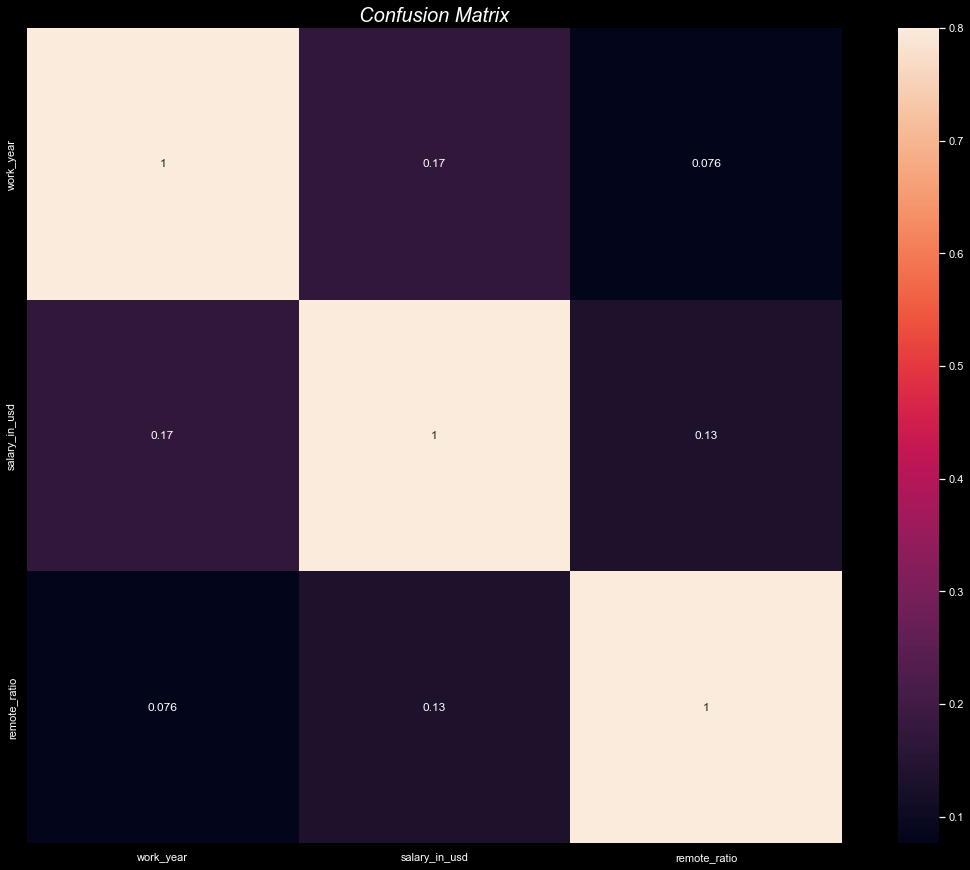

In [40]:
fig, ax = plt.subplots() 
fig.set_size_inches(20,15)
sns.heatmap(df.corr(), vmax =.8, square = True, annot = True)
plt.title('Confusion Matrix',fontsize=20,fontstyle= 'oblique')